In [1]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
!pip install tensorflow numpy matplotlib scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [6]:
X = lfw_people.images
y = lfw_people.target

# Normalize pixel values to [0, 1]
X = X / 255.0

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a channel dimension for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(lfw_people.target_names), activation='softmax')  # Output layer
])

C:\Users\AI_LAB\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3463 - loss: 1.8734 - val_accuracy: 0.4029 - val_loss: 1.6574
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4207 - loss: 1.7061 - val_accuracy: 0.4029 - val_loss: 1.6787
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4019 - loss: 1.7133 - val_accuracy: 0.4029 - val_loss: 1.6707
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3637 - loss: 1.7761 - val_accuracy: 0.4029 - val_loss: 1.6657
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4187 - loss: 1.6696 - val_accuracy: 0.4029 - val_loss: 1.6887
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3920 - loss: 1.7196 - val_accuracy: 0.4029 - val_loss: 1.6631
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4111 - loss: 1.6849 - val_accuracy: 0.4029 - val_loss: 1.6685
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4046 - loss: 1.7104 - val_accuracy: 0.4029 - v

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

9/9 - 0s - 5ms/step - accuracy: 0.4612 - loss: 1.6026
Test Accuracy: 0.4612


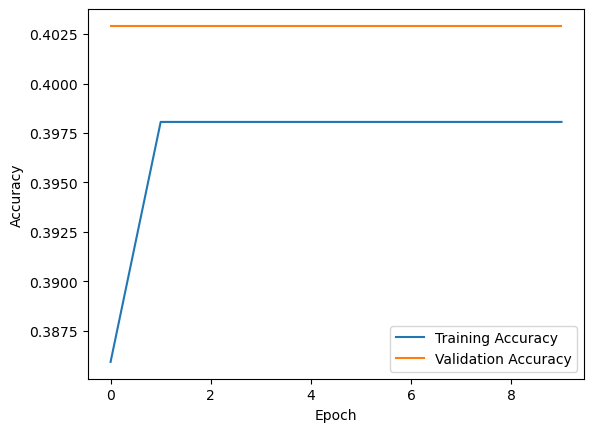

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


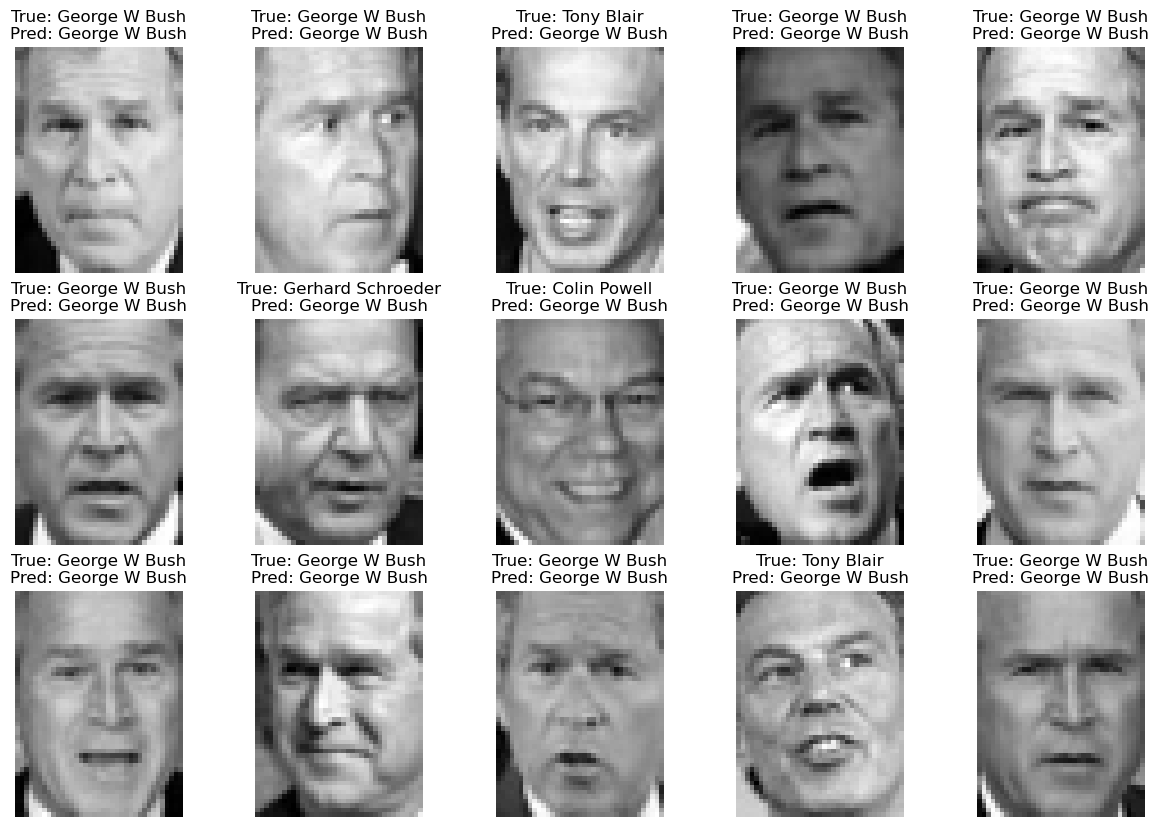

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display some predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].squeeze(), cmap='gray')
    ax.set_title(f"True: {lfw_people.target_names[y_true_classes[i]]}\nPred: {lfw_people.target_names[y_pred_classes[i]]}")
    ax.axis('off')
plt.show()